C:\Users\Shamil\anaconda3\envs\ML_Project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's l2: 1.12892e+08	valid_0's l2: 6.31603e+07
[40]	training's l2: 1.05989e+08	valid_0's l2: 6.28162e+07
[60]	training's l2: 1.00678e+08	valid_0's l2: 6.29359e+07
[80]	training's l2: 9.64645e+07	valid_0's l2: 6.33668e+07
[100]	training's l2: 9.27741e+07	valid_0's l2: 6.39151e+07
Training accuracy 0.2442
Testing accuracy 0.0314
0.03143171390146715


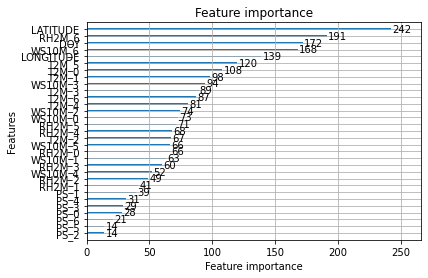

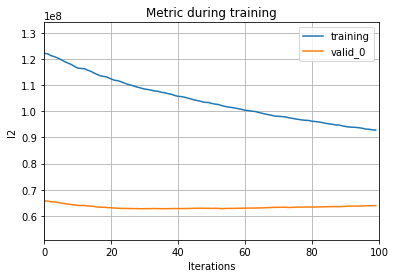

In [32]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('Data_final.csv')
data.head()

# To define the input and output feature
x = data.drop(['FIRE_SIZE','DISCOVERY_DATE','DUR','ID'],axis=1)
y = data.FIRE_SIZE
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = lgb.LGBMRegressor(learning_rate=0.03,max_depth=5,random_state=42,num_leaves=32,subsample=0.7,colsample_bytree=0.45)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],verbose=20,eval_metric='l2')

print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

pred = model.predict(x_test)
print(metrics.r2_score(y_test,pred))

lgb.plot_importance(model)
lgb.plot_metric(model)

model.booster_.save_model("wildfire_detector.model")
# model = lgb.Booster(model_file='wildfire_detector.model')
# model.predict()